In [1]:
# --- necessary libraries ---
import pickle

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm, tqdm_notebook
import time
from time import sleep

import numpy as np
import sys
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# --- Load features, labels, + retrofitted ---

# features_train
path_features_train = "[02] Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "[02] Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "[02] Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "[02] Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)
    
# features_train retrofitted
path_features_train = "[02] Data/features_train_retrofitted.pickle"
with open(path_features_train, 'rb') as data:
    X_retrofitted_vectors = pickle.load(data)

In [3]:
# features_test retrofitted
path_features_train = "[02] Data/features_test_retrofitted.pickle"
with open(path_features_train, 'rb') as data:
    X_retrofitted_vectors_test = pickle.load(data)

## 001. Logisting Regression classifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf_embeddings = LogisticRegression(C=10.0, max_iter=100000, solver = 'lbfgs')
clf_retrofit_embeddings = LogisticRegression(C=10.0, max_iter=100000, solver = 'lbfgs')

In [15]:
%%time

print('\tОбучение оригинальных эмбеддингов', file=sys.stderr, flush=True)
clf_embeddings.fit(features_train, labels_train)

print('\tОбучение ретрофиченных эмбеддингов', file=sys.stderr, flush=True)
clf_retrofit_embeddings.fit(X_retrofitted_vectors, labels_train)

	Обучение оригинальных эмбеддингов
	Обучение ретрофиченных эмбеддингов


Wall time: 13min 40s


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
%%time
# predictions
lrc_pred_embeddings = clf_embeddings.predict(features_test)
lrc_pred_embeddings_retrofitted = clf_retrofit_embeddings.predict(X_retrofitted_vectors_test)

Wall time: 57.8 ms


In [17]:
# Training accuracy
print("Точность обучающей выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_train, clf_embeddings.predict(features_train)))
print("Точность обучающей выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_train, clf_retrofit_embeddings.predict(X_retrofitted_vectors)))

# Test accuracy
print("Точность тестовой выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_test, lrc_pred_embeddings))
print("Точность тестовой выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_test, lrc_pred_embeddings_retrofitted))

Точность обучающей выборки оригинальных эмбеддингов: 
0.7341431573584666
Точность обучающей выборки сретрофиченных эмбеддингов: 
0.9707062344774884
Точность тестовой выборки оригинальных эмбеддингов: 
0.7241643736749515
Точность тестовой выборки сретрофиченных эмбеддингов: 
0.958861473228382


In [18]:
def heatconmat(y_true,y_pred):
    sns.set(font_scale=2, style='whitegrid')
    plt.figure(figsize=(35,15))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                linewidths=.5,
                cmap="PuRd",
                yticklabels=sorted(labels_test.unique()),
                xticklabels = sorted(labels_test.unique())
               )
    plt.ylim((-0.5, 19.0))
    plt.ylabel('Предсказание', labelpad=14)
    plt.xlabel('Факт', labelpad=14)
    plt.title('Confusion матрица. Классификатор Logistic Regression')
    plt.show()

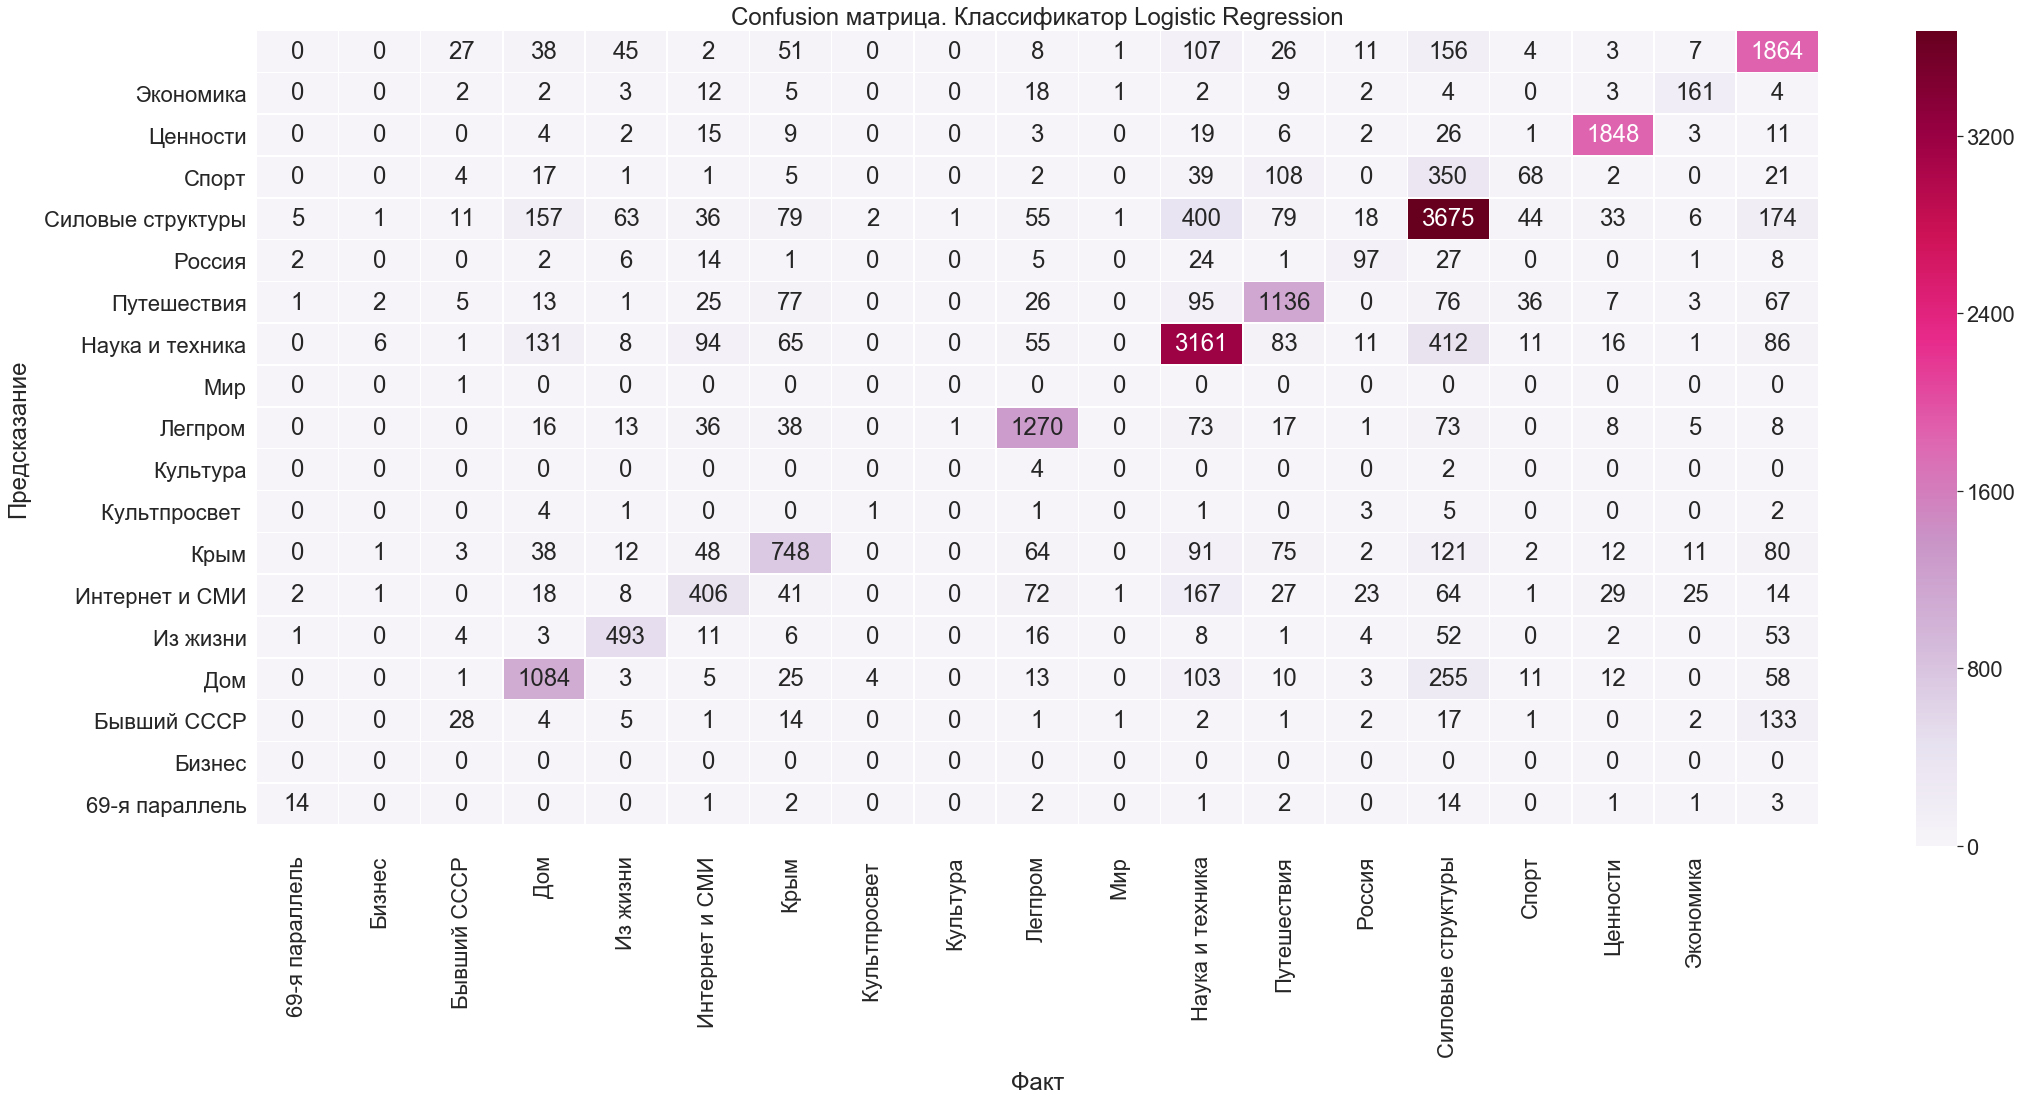

In [19]:
heatconmat(labels_test,lrc_pred_embeddings)

In [20]:
print(classification_report(labels_test,lrc_pred_embeddings))

C:\Users\a.lapikov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

   69-я параллель       0.56      0.34      0.42        41
       Библиотека       0.00      0.00      0.00         0
           Бизнес       0.32      0.13      0.19       212
      Бывший СССР       0.71      0.68      0.70      1587
              Дом       0.74      0.75      0.75       654
         Из жизни       0.57      0.45      0.51       899
   Интернет и СМИ       0.64      0.57      0.60      1308
             Крым       0.14      0.06      0.08        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.79      0.81      0.80      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.74      0.76      0.75      4141
  Наука и техника       0.72      0.72      0.72      1570
      Путешествия       0.54      0.52      0.53       188
           Россия       0.69      0.76      0.72      4840
Силовые структуры       0.38      0.11      0.17       

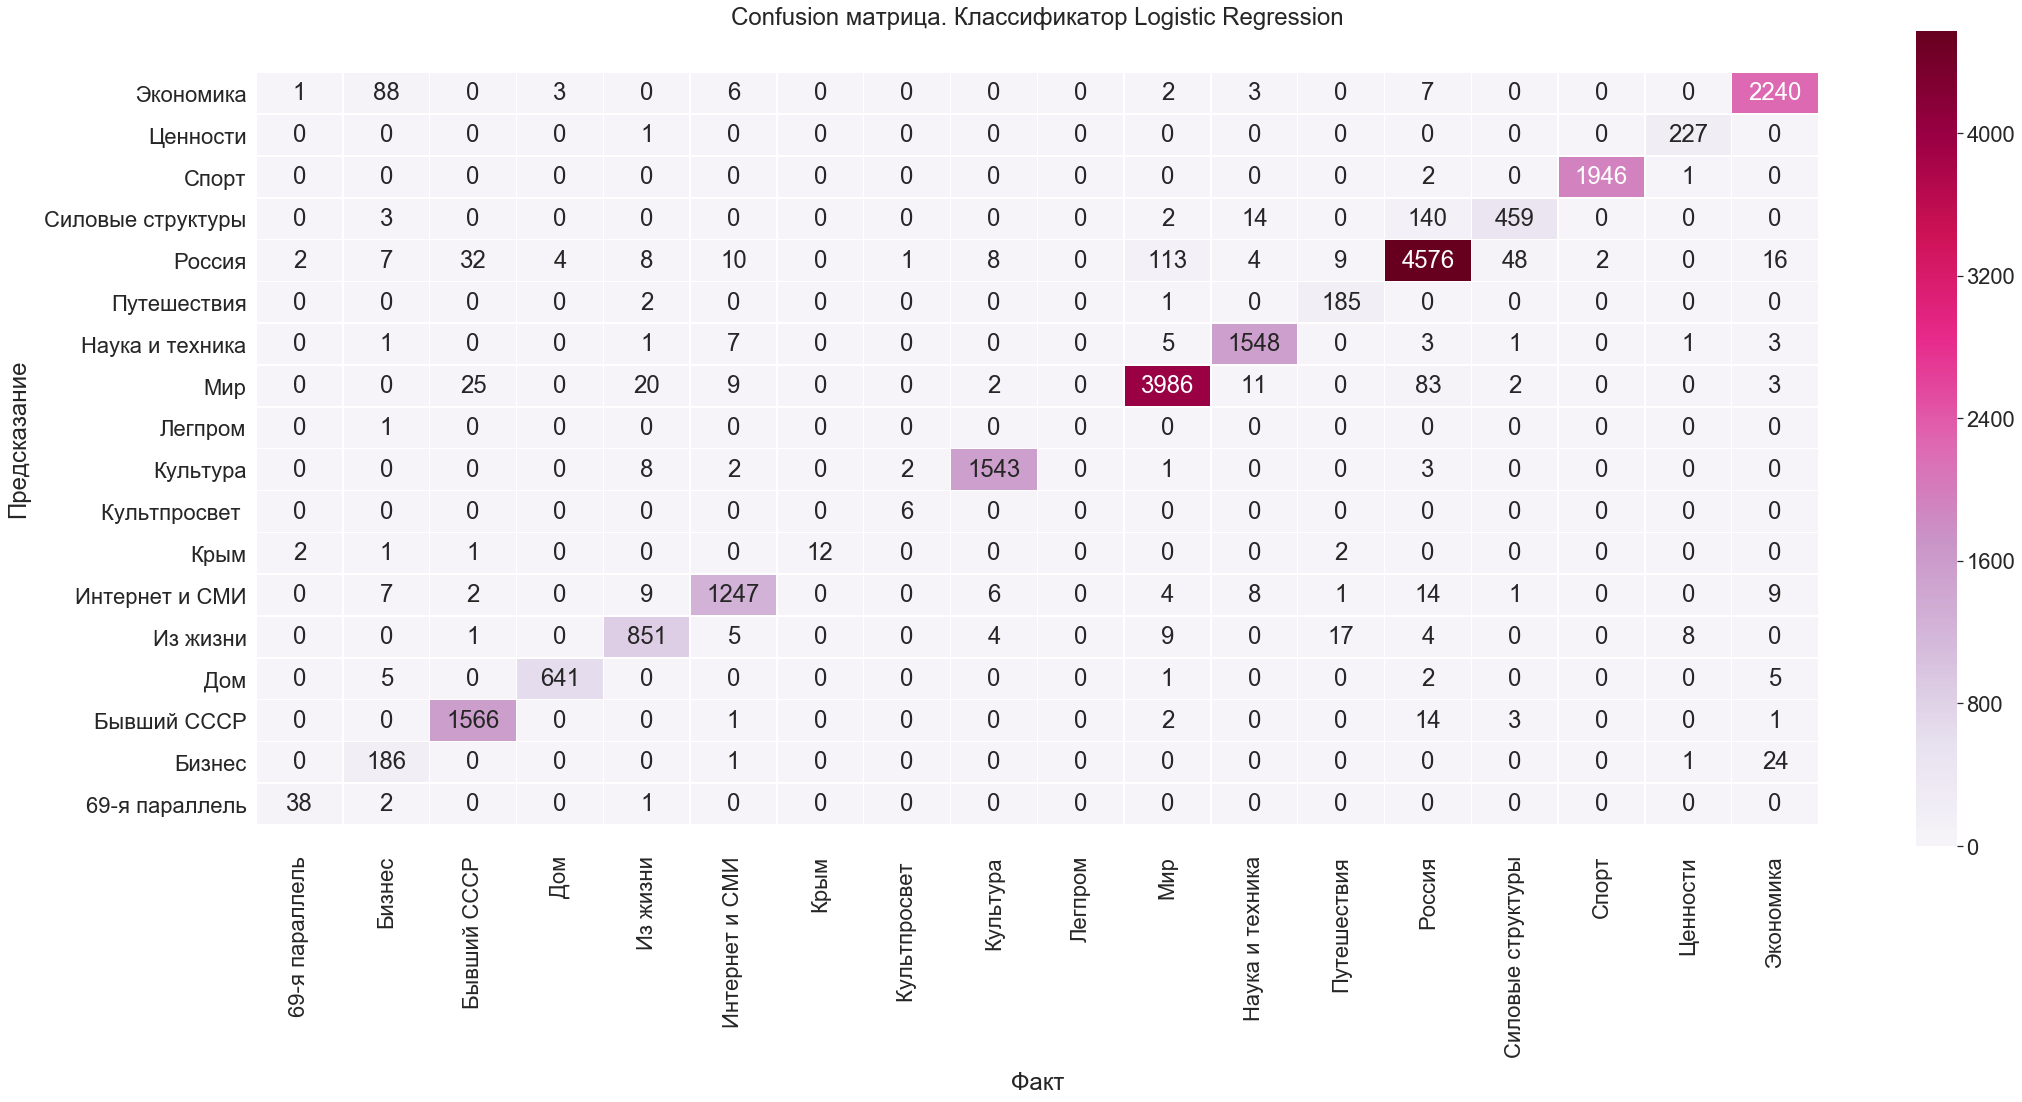

In [21]:
heatconmat(labels_test,lrc_pred_embeddings_retrofitted)

In [22]:
print(classification_report(labels_test,lrc_pred_embeddings_retrofitted))

C:\Users\a.lapikov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

   69-я параллель       0.88      0.93      0.90        41
           Бизнес       0.62      0.88      0.73       212
      Бывший СССР       0.96      0.99      0.97      1587
              Дом       0.99      0.98      0.98       654
         Из жизни       0.94      0.95      0.95       899
   Интернет и СМИ       0.97      0.95      0.96      1308
             Крым       1.00      0.67      0.80        18
    Культпросвет        0.67      1.00      0.80         6
         Культура       0.99      0.99      0.99      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.97      0.96      0.96      4141
  Наука и техника       0.97      0.99      0.98      1570
      Путешествия       0.86      0.98      0.92       188
           Россия       0.94      0.95      0.94      4840
Силовые структуры       0.89      0.74      0.81       618
            Спорт       1.00      1.00      1.00      1

In [23]:
d_lrc = {
     'Model': 'Logistic Regression',
     'Тrain Accuracy orig.emb.': accuracy_score(labels_train, clf_embeddings.predict(features_train)),
     'Тest Accuracy orig.emb.': accuracy_score(labels_test, lrc_pred_embeddings),
     'Тrain Accuracy ret.emb.': accuracy_score(labels_train, clf_retrofit_embeddings.predict(X_retrofitted_vectors)),
     'Тest Accuracy ret.emb.': accuracy_score(labels_test, lrc_pred_embeddings_retrofitted)
}

df_models_lrc = pd.DataFrame(d_lrc, index=[0])

In [24]:
df_models_lrc

,Model,Тrain Accuracy orig.emb.,Тest Accuracy orig.emb.,Тrain Accuracy ret.emb.,Тest Accuracy ret.emb.
0,Logistic Regression,0.734143,0.724164,0.970706,0.958861


## 002. KNN classificator

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
cknn_embeddings = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                         metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                                         weights='uniform')

cknn_retrofit_embeddings = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                         metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                                         weights='uniform')

In [16]:
%%time

print('\tОбучение оригинальных эмбеддингов', file=sys.stderr, flush=True)
cknn_embeddings.fit(features_train, labels_train)

print('\tОбучение ретрофиченных эмбеддингов', file=sys.stderr, flush=True)
cknn_retrofit_embeddings.fit(X_retrofitted_vectors, labels_train)

	Обучение оригинальных эмбеддингов
	Обучение ретрофиченных эмбеддингов


Wall time: 10.7 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [17]:
%%time
# predictions
knnc_pred_embeddings = cknn_embeddings.predict(features_test)
knnc_pred_embeddings_retrofitted = cknn_retrofit_embeddings.predict(X_retrofitted_vectors_test)

Wall time: 25min 25s


In [18]:
# Training accuracy
print("Точность обучающей выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_train, cknn_embeddings.predict(features_train)))
print("Точность обучающей выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_train, cknn_retrofit_embeddings.predict(X_retrofitted_vectors)))

# Test accuracy
print("Точность тестовой выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_test, knnc_pred_embeddings))
print("Точность тестовой выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_test, knnc_pred_embeddings_retrofitted))

Точность обучающей выборки оригинальных эмбеддингов: 
0.7352257530408203
Точность обучающей выборки сретрофиченных эмбеддингов: 
0.951410558492008
Точность тестовой выборки оригинальных эмбеддингов: 
0.518561955884343
Точность тестовой выборки сретрофиченных эмбеддингов: 
0.9134376832513871


In [21]:
def heatconmat(y_true,y_pred):
    sns.set(font_scale=2, style='whitegrid')
    plt.figure(figsize=(35,15))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                linewidths=.5,
                cmap="PuRd",
                yticklabels=sorted(labels_test.unique()),
                xticklabels = sorted(labels_test.unique())
               )
    plt.ylim((-0.5, 19.0))
    plt.ylabel('Предсказание', labelpad=14)
    plt.xlabel('Факт', labelpad=14)
    plt.title('Confusion матрица. Классификатор k-Nearest Neighbours')
    plt.show()

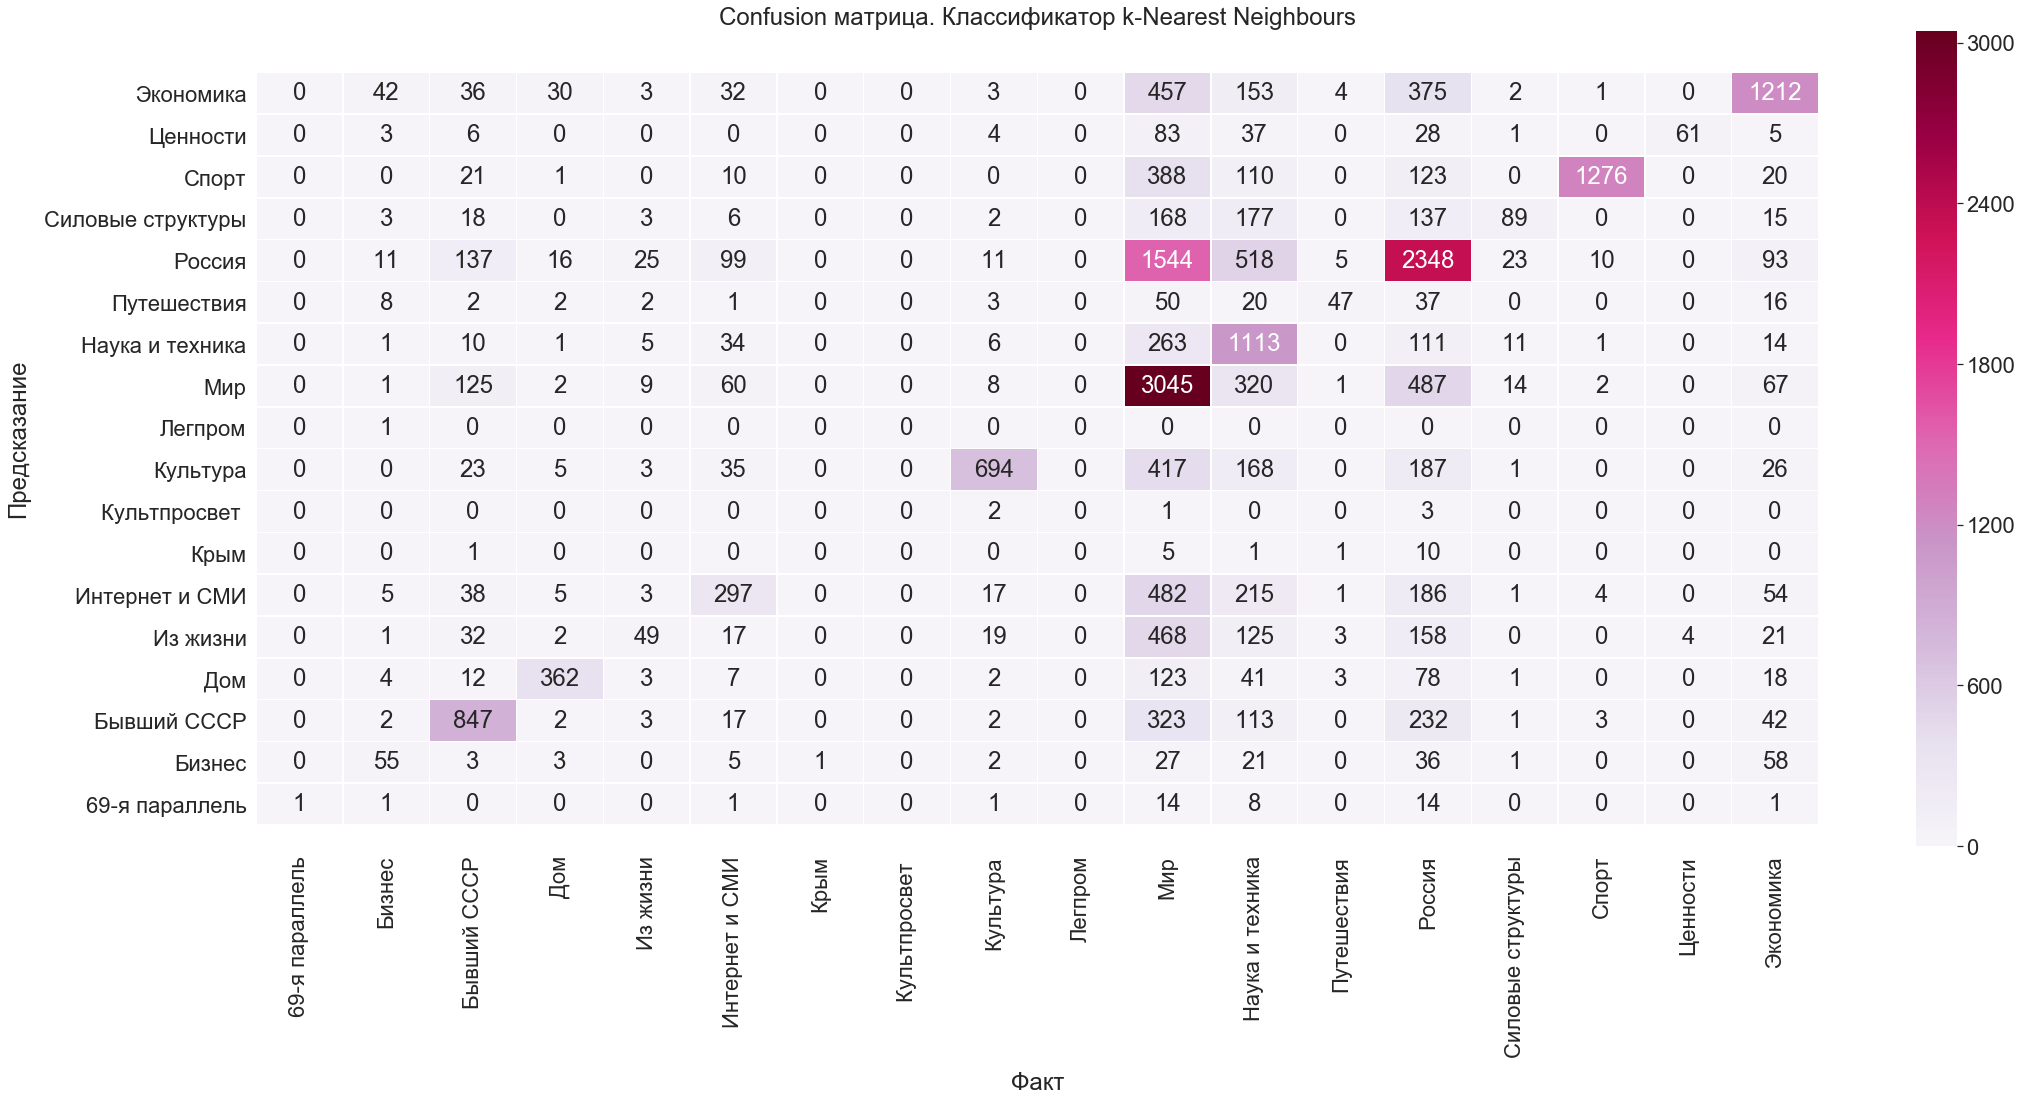

In [22]:
heatconmat(labels_test,knnc_pred_embeddings)

In [24]:
print(classification_report(labels_test,knnc_pred_embeddings))

C:\Users\a.lapikov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

   69-я параллель       1.00      0.02      0.05        41
           Бизнес       0.40      0.26      0.31       212
      Бывший СССР       0.65      0.53      0.58      1587
              Дом       0.84      0.55      0.67       654
         Из жизни       0.45      0.05      0.10       899
   Интернет и СМИ       0.48      0.23      0.31      1308
             Крым       0.00      0.00      0.00        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.89      0.45      0.59      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.39      0.74      0.51      4141
  Наука и техника       0.35      0.71      0.47      1570
      Путешествия       0.72      0.25      0.37       188
           Россия       0.52      0.49      0.50      4840
Силовые структуры       0.61      0.14      0.23       618
            Спорт       0.98      0.65      0.79      1

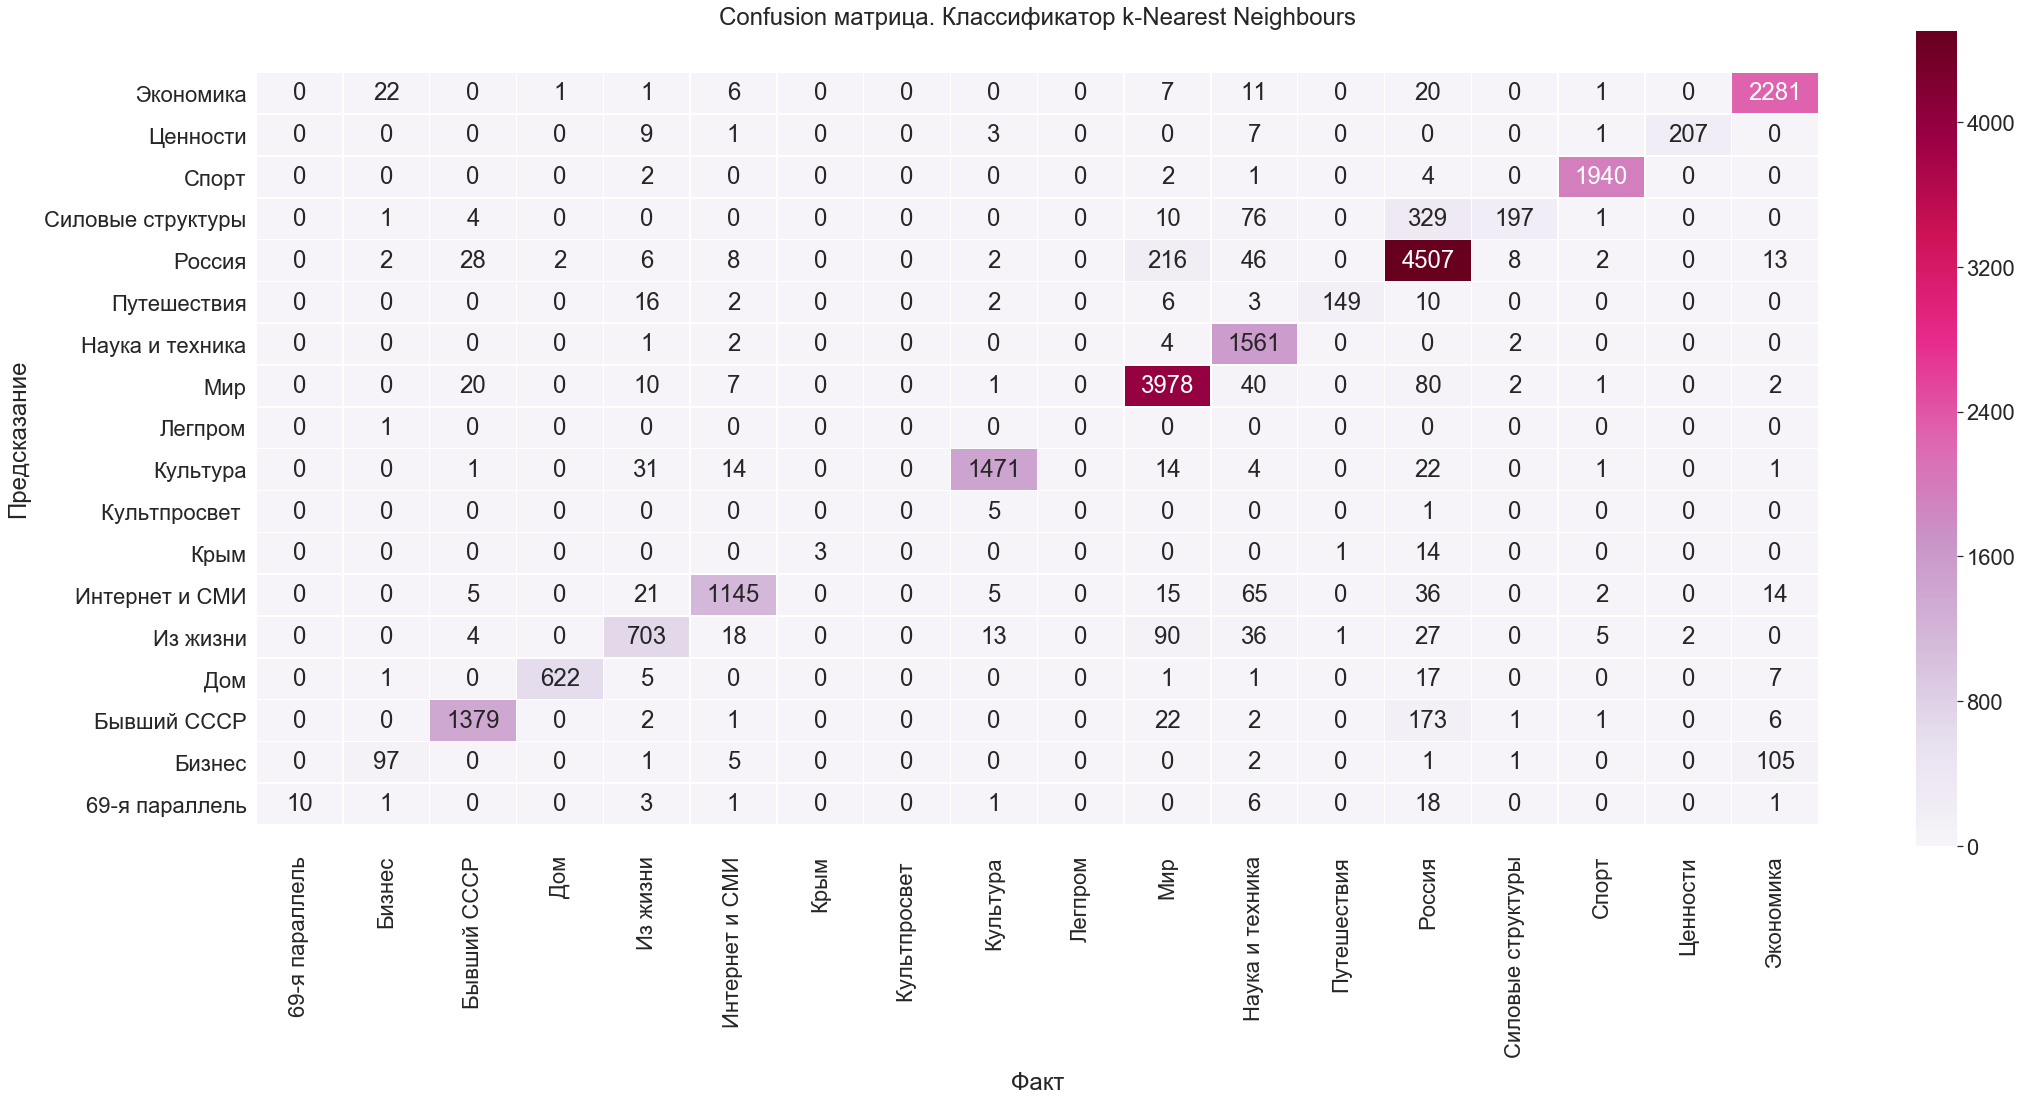

In [23]:
heatconmat(labels_test,knnc_pred_embeddings_retrofitted)

In [25]:
print(classification_report(labels_test,knnc_pred_embeddings_retrofitted))

                   precision    recall  f1-score   support

   69-я параллель       1.00      0.24      0.39        41
           Бизнес       0.78      0.46      0.58       212
      Бывший СССР       0.96      0.87      0.91      1587
              Дом       1.00      0.95      0.97       654
         Из жизни       0.87      0.78      0.82       899
   Интернет и СМИ       0.95      0.88      0.91      1308
             Крым       1.00      0.17      0.29        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.98      0.94      0.96      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.91      0.96      0.94      4141
  Наука и техника       0.84      0.99      0.91      1570
      Путешествия       0.99      0.79      0.88       188
           Россия       0.86      0.93      0.89      4840
Силовые структуры       0.93      0.32      0.48       618
            Спорт       0.99      1.00      0.99      1

In [36]:
d_knnc = {
     'Model': 'k Nearest Neighbours',
     'Тrain Accuracy orig.emb.': accuracy_score(labels_train, cknn_embeddings.predict(features_train)),
     'Тest Accuracy orig.emb.': accuracy_score(labels_test, knnc_pred_embeddings),
     'Тrain Accuracy ret.emb.': accuracy_score(labels_train, cknn_retrofit_embeddings.predict(X_retrofitted_vectors)),
     'Тest Accuracy ret.emb.': accuracy_score(labels_test, knnc_pred_embeddings_retrofitted)
}

df_models_knnc = pd.DataFrame(d_knnc, index=[0])

In [45]:
df_models_knnc["Model"].replace({"Logistic Regression": "k Nearest Neighbours"}, inplace=True)

In [46]:
df_models_knnc 

,Model,Тrain Accuracy orig.emb.,Тest Accuracy orig.emb.,Тrain Accuracy ret.emb.,Тest Accuracy ret.emb.
0,k Nearest Neighbours,0.735226,0.518562,0.951411,0.913438


## 003. Random Forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
crf_embeddings = RandomForestClassifier(class_weight=None, criterion='gini',
                                         max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                                         min_impurity_decrease=0.0, min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=5,
                                         min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                         oob_score=False, random_state=5, verbose=0, warm_start=False)

crf_retrofit_embeddings = RandomForestClassifier(class_weight=None, criterion='gini',
                                         max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                                         min_impurity_decrease=0.0, min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=5,
                                         min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                                         oob_score=False, random_state=5, verbose=0, warm_start=False)

In [28]:
%%time

print('\tОбучение оригинальных эмбеддингов', file=sys.stderr, flush=True)
crf_embeddings.fit(features_train, labels_train)

print('\tОбучение ретрофиченных эмбеддингов', file=sys.stderr, flush=True)
crf_retrofit_embeddings.fit(X_retrofitted_vectors, labels_train)

	Обучение оригинальных эмбеддингов
	Обучение ретрофиченных эмбеддингов


Wall time: 11min 41s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                       oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [30]:
# Predictions - Прогнозы Random Forest Classifier
predictions_embeddings_crf = crf_embeddings.predict(features_test)
predictions_retrofit_embedding_crf = crf_retrofit_embeddings.predict(X_retrofitted_vectors_test)

In [32]:
# Training accuracy
print("Точность обучающей выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_train, crf_embeddings.predict(features_train)))
print("Точность обучающей выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_train, crf_retrofit_embeddings.predict(X_retrofitted_vectors)))

# Test accuracy
print("Точность тестовой выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_embeddings_crf))
print("Точность тестовой выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_retrofit_embedding_crf))

Точность обучающей выборки оригинальных эмбеддингов: 
0.9999920397376297
Точность обучающей выборки сретрофиченных эмбеддингов: 
0.9999442781634083
Точность тестовой выборки оригинальных эмбеддингов: 
0.6271369930984708
Точность тестовой выборки сретрофиченных эмбеддингов: 
0.8944923090802472


In [53]:
def heatconmat(y_true,y_pred):
    sns.set(font_scale=2, style='whitegrid')
    plt.figure(figsize=(35,15))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                linewidths=.5,
                cmap="PuRd",
                yticklabels=sorted(labels_test.unique()),
                xticklabels = sorted(labels_test.unique())
               )
    plt.ylim((-0.5, 19.0))
    plt.ylabel('Предсказание', labelpad=14)
    plt.xlabel('Факт', labelpad=14)
    plt.title('Confusion матрица. Классификатор Random Forest')
    plt.show()

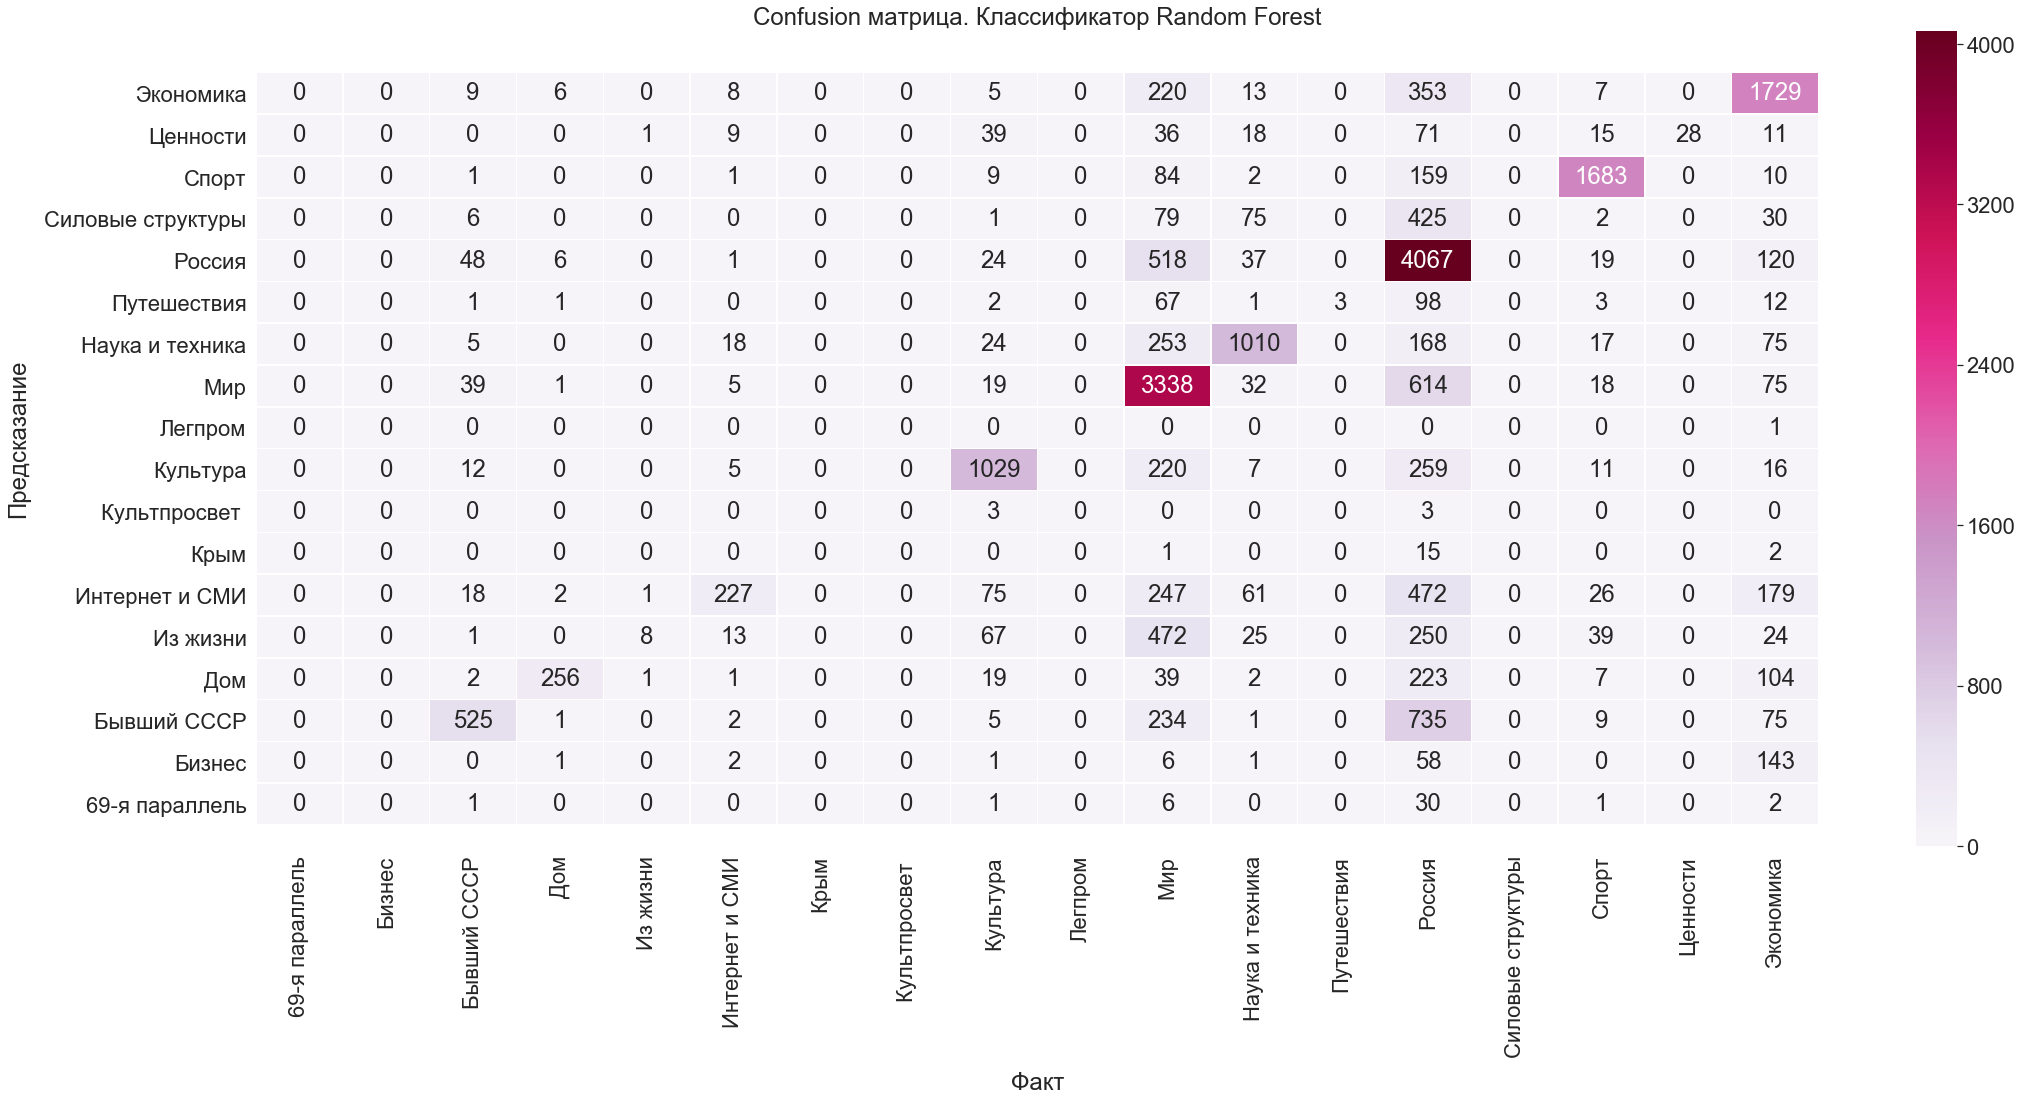

In [54]:
heatconmat(labels_test,predictions_embeddings_crf)

In [55]:
print(classification_report(labels_test,predictions_embeddings_crf))

C:\Users\a.lapikov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00        41
           Бизнес       0.00      0.00      0.00       212
      Бывший СССР       0.79      0.33      0.47      1587
              Дом       0.93      0.39      0.55       654
         Из жизни       0.73      0.01      0.02       899
   Интернет и СМИ       0.78      0.17      0.28      1308
             Крым       0.00      0.00      0.00        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.78      0.66      0.71      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.57      0.81      0.67      4141
  Наука и техника       0.79      0.64      0.71      1570
      Путешествия       1.00      0.02      0.03       188
           Россия       0.51      0.84      0.63      4840
Силовые структуры       0.00      0.00      0.00       618
            Спорт       0.91      0.86      0.88      1

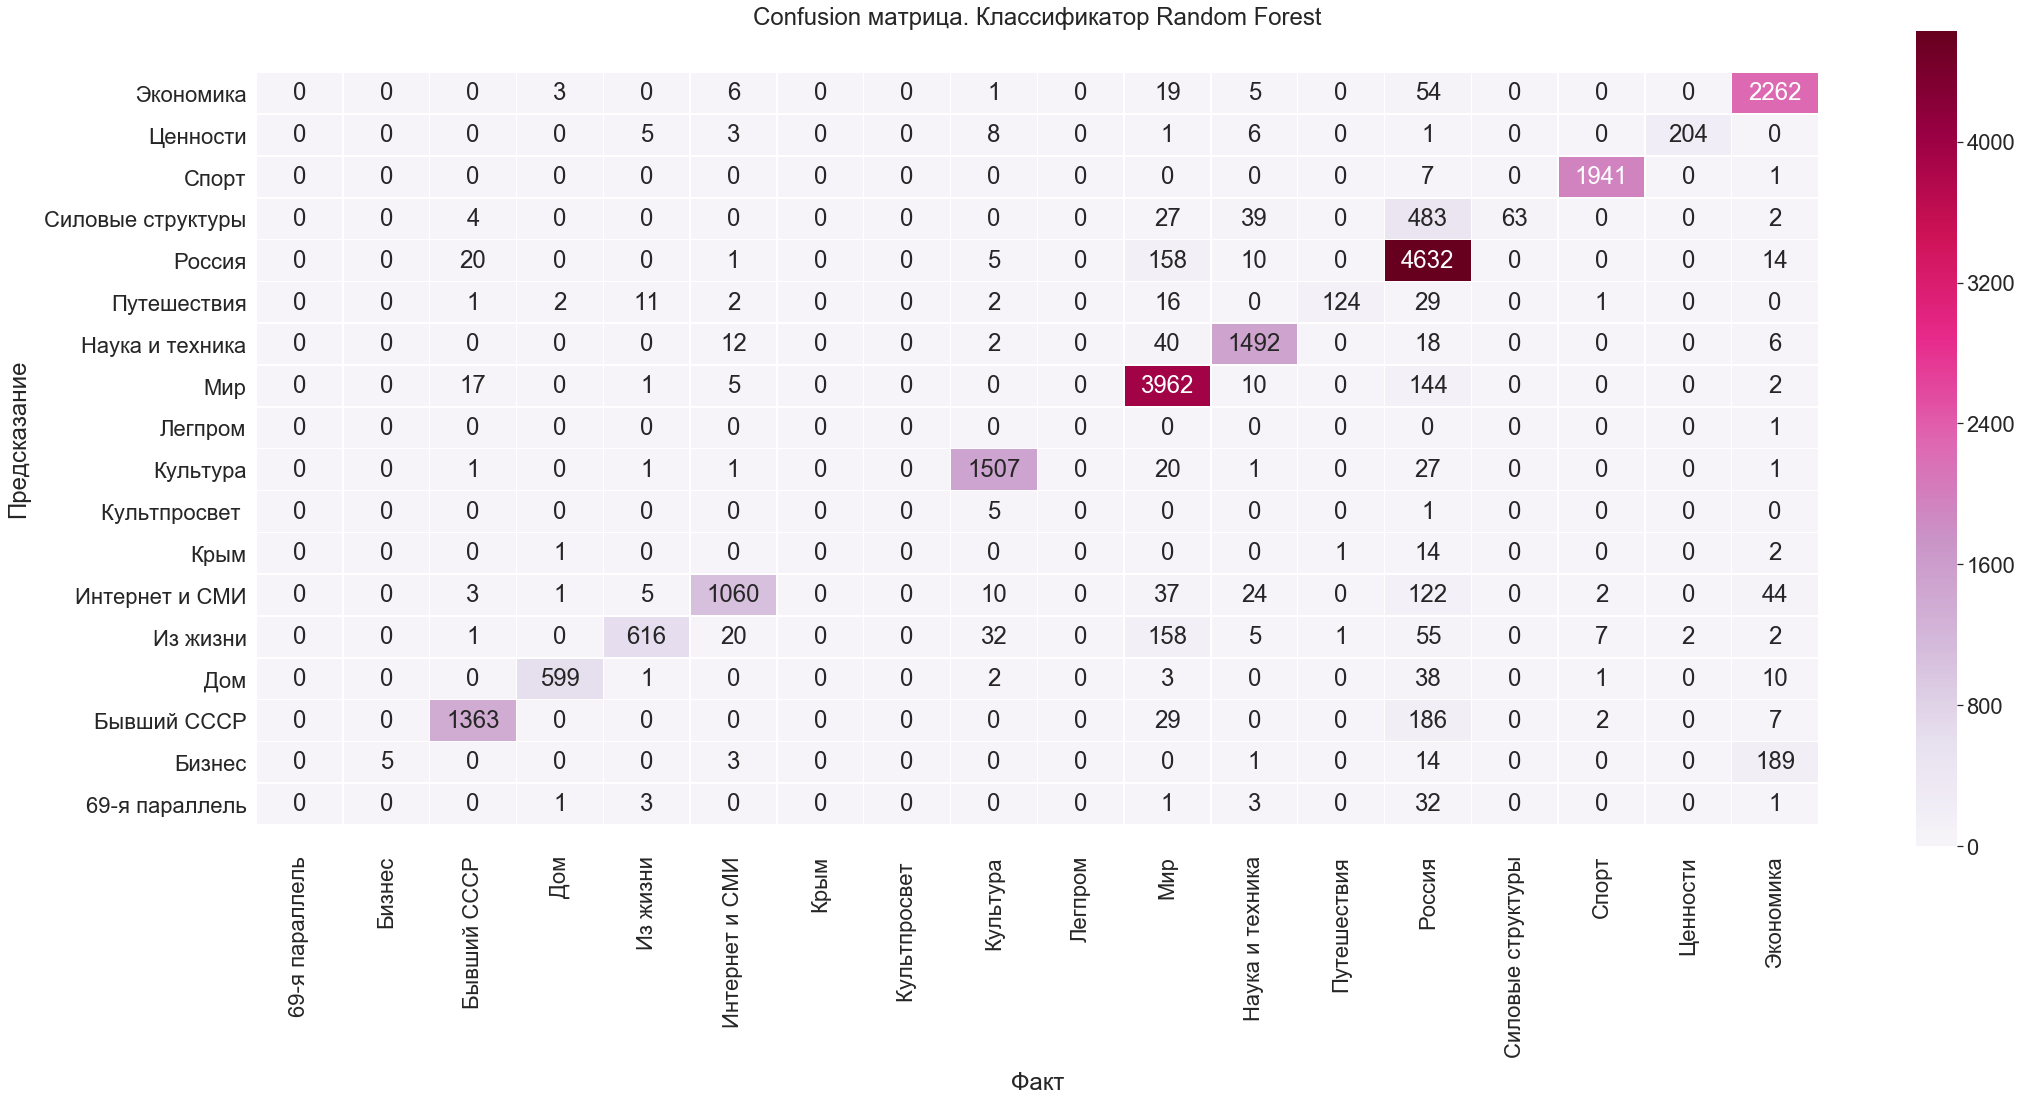

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00        41
           Бизнес       1.00      0.02      0.05       212
      Бывший СССР       0.97      0.86      0.91      1587
              Дом       0.99      0.92      0.95       654
         Из жизни       0.96      0.69      0.80       899
   Интернет и СМИ       0.95      0.81      0.88      1308
             Крым       0.00      0.00      0.00        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.96      0.97      0.96      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.89      0.96      0.92      4141
  Наука и техника       0.93      0.95      0.94      1570
      Путешествия       0.98      0.66      0.79       188
           Россия       0.79      0.96      0.87      4840
Силовые структуры       1.00      0.10      0.19       618
            Спорт       0.99      1.00      0.99      1

In [56]:
heatconmat(labels_test,predictions_retrofit_embedding_crf)
print(classification_report(labels_test,predictions_retrofit_embedding_crf))

In [41]:
d_crf = {
     'Model': 'Logistic Regression',
     'Тrain Accuracy orig.emb.': accuracy_score(labels_train, crf_embeddings.predict(features_train)),
     'Тest Accuracy orig.emb.': accuracy_score(labels_test, predictions_embeddings_crf),
     'Тrain Accuracy ret.emb.': accuracy_score(labels_train, crf_retrofit_embeddings.predict(X_retrofitted_vectors)),
     'Тest Accuracy ret.emb.': accuracy_score(labels_test, predictions_retrofit_embedding_crf)
}

df_models_crf = pd.DataFrame(d_crf, index=[0])

In [43]:
df_models_crf["Model"].replace({"Logistic Regression": "Random Forest"}, inplace=True)

In [44]:
df_models_crf

,Model,Тrain Accuracy orig.emb.,Тest Accuracy orig.emb.,Тrain Accuracy ret.emb.,Тest Accuracy ret.emb.
0,Random Forest,0.999992,0.627137,0.999944,0.894492


## 004. SVC Support Vector Classifier

In [4]:
from sklearn import svm

Best C: 1000 
Best Kernel: rbf 
Best Gamma: 0.001 

In [5]:
csvc_embeddings = svm.SVC(kernel = 'rbf', C = 1000, gamma = 0.001)

csvc_retrofit_embeddings = svm.SVC(kernel = 'rbf', C = 1000, gamma = 0.001)

In [6]:
%%time

print('\tОбучение оригинальных эмбеддингов', file=sys.stderr, flush=True)
csvc_embeddings.fit(features_train, labels_train)

print('\tОбучение ретрофиченных эмбеддингов', file=sys.stderr, flush=True)
csvc_retrofit_embeddings.fit(X_retrofitted_vectors, labels_train)

	Обучение оригинальных эмбеддингов
	Обучение ретрофиченных эмбеддингов


Wall time: 2h 36min 18s


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
%%time

# Predictions - Прогнозы Support Vector Machines SVC
predictions_embeddings_csvm = csvc_embeddings.predict(features_test)
predictions_retrofit_embedding_csvn = csvc_retrofit_embeddings.predict(X_retrofitted_vectors_test)

Wall time: 4min 39s


In [8]:
%%time
# Training accuracy
print("Точность обучающей выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_train, csvc_embeddings.predict(features_train)))
print("Точность обучающей выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_train, csvc_retrofit_embeddings.predict(X_retrofitted_vectors)))

# Test accuracy
print("Точность тестовой выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_embeddings_csvm))
print("Точность тестовой выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_retrofit_embedding_csvn))

Точность обучающей выборки оригинальных эмбеддингов: 
0.9995701458320067
Точность обучающей выборки сретрофиченных эмбеддингов: 
0.9999522384257785
Точность тестовой выборки оригинальных эмбеддингов: 
0.7358022463800803
Точность тестовой выборки сретрофиченных эмбеддингов: 
0.9608913347467184
Wall time: 26min 42s


### C = 10, gamma = 0.1, kernel = Radial Bayes Function

In [36]:
csvc_embeddings_2 = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.1)

csvc_retrofit_embeddings_2 = svm.SVC(kernel = 'rbf', C = 10, gamma = 0.1)

In [37]:
%%time

print('\tОбучение оригинальных эмбеддингов', file=sys.stderr, flush=True)
csvc_embeddings_2.fit(features_train, labels_train)

print('\tОбучение ретрофиченных эмбеддингов', file=sys.stderr, flush=True)
csvc_retrofit_embeddings_2.fit(X_retrofitted_vectors, labels_train)

	Обучение оригинальных эмбеддингов
	Обучение ретрофиченных эмбеддингов


Wall time: 21h 48min 56s


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
%%time

# Predictions - Прогнозы Support Vector Machines SVC
predictions_embeddings_csvm_2 = csvc_embeddings_2.predict(features_test)
predictions_retrofit_embedding_csvn_2 = csvc_retrofit_embeddings_2.predict(X_retrofitted_vectors_test)

Wall time: 12min 11s


In [39]:
%%time
# Training accuracy
print("Точность обучающей выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_train, csvc_embeddings_2.predict(features_train)))
print("Точность обучающей выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_train, csvc_retrofit_embeddings_2.predict(X_retrofitted_vectors)))

# Test accuracy
print("Точность тестовой выборки оригинальных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_embeddings_csvm_2))
print("Точность тестовой выборки сретрофиченных эмбеддингов: ")
print(accuracy_score(labels_test, predictions_retrofit_embedding_csvn_2))

Точность обучающей выборки оригинальных эмбеддингов: 
0.9997054702923008
Точность обучающей выборки сретрофиченных эмбеддингов: 
1.0
Точность тестовой выборки оригинальных эмбеддингов: 
0.21818755920429428
Точность тестовой выборки сретрофиченных эмбеддингов: 
0.33524290676169427
Wall time: 1h 7min 45s


In [9]:
def heatconmat(y_true,y_pred):
    sns.set(font_scale=2, style='whitegrid')
    plt.figure(figsize=(35,15))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                linewidths=.5,
                cmap="PuRd",
                yticklabels=sorted(labels_test.unique()),
                xticklabels = sorted(labels_test.unique())
               )
    plt.ylim((-0.5, 19.0))
    plt.ylabel('Предсказание', labelpad=14)
    plt.xlabel('Факт', labelpad=14)
    plt.title('Confusion матрица. Классификатор Support Vector Machines, SVC')
    plt.show()

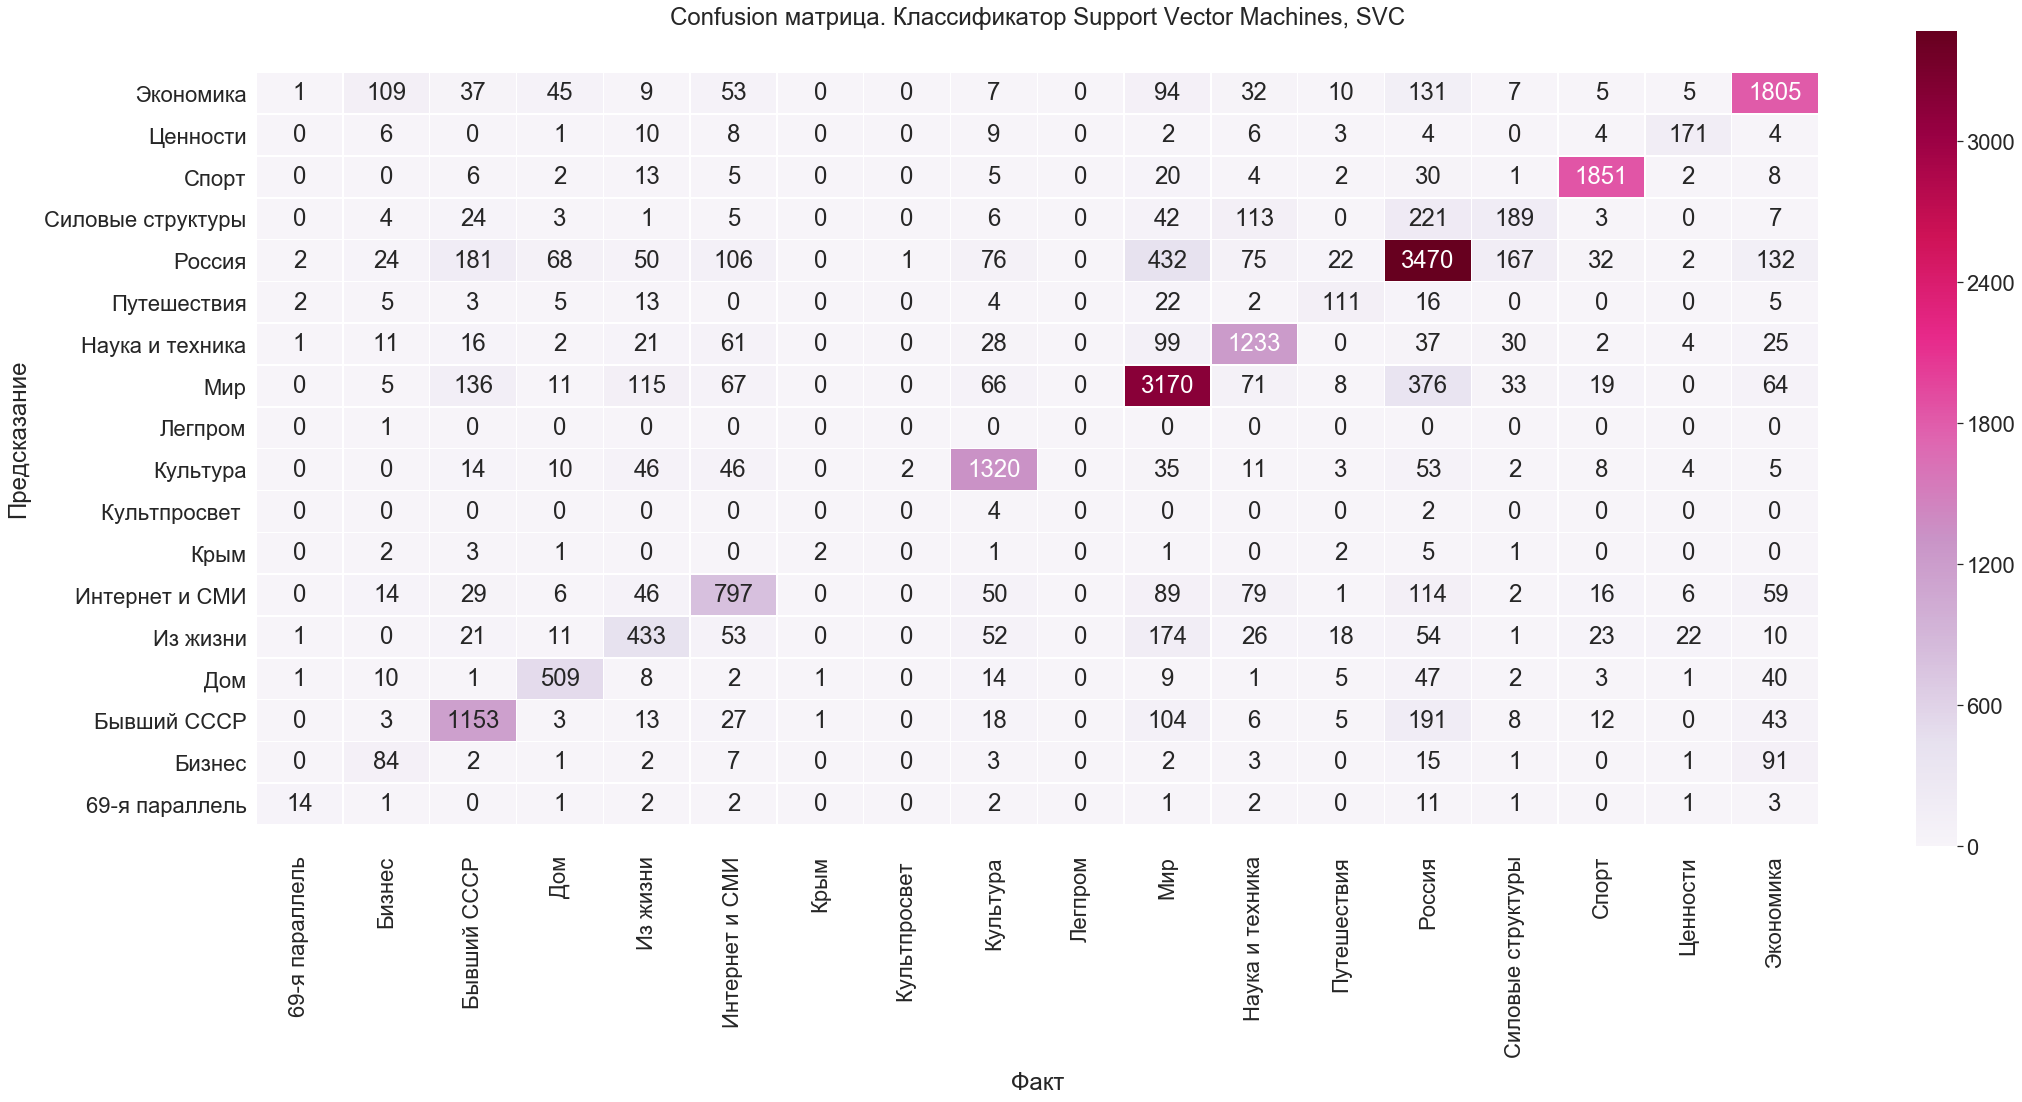

C:\Users\a.lapikov\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

   69-я параллель       0.64      0.34      0.44        41
           Бизнес       0.30      0.40      0.34       212
      Бывший СССР       0.71      0.73      0.72      1587
              Дом       0.75      0.78      0.76       654
         Из жизни       0.55      0.48      0.52       899
   Интернет и СМИ       0.64      0.61      0.63      1308
             Крым       0.50      0.11      0.18        18
    Культпросвет        0.00      0.00      0.00         6
         Культура       0.79      0.85      0.82      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.74      0.77      0.75      4141
  Наука и техника       0.74      0.79      0.76      1570
      Путешествия       0.58      0.59      0.59       188
           Россия       0.73      0.72      0.72      4840
Силовые структуры       0.42      0.31      0.36       618
            Спорт       0.94      0.95      0.94      1

In [10]:
heatconmat(labels_test,predictions_embeddings_csvm)
print(classification_report(labels_test,predictions_embeddings_csvm))

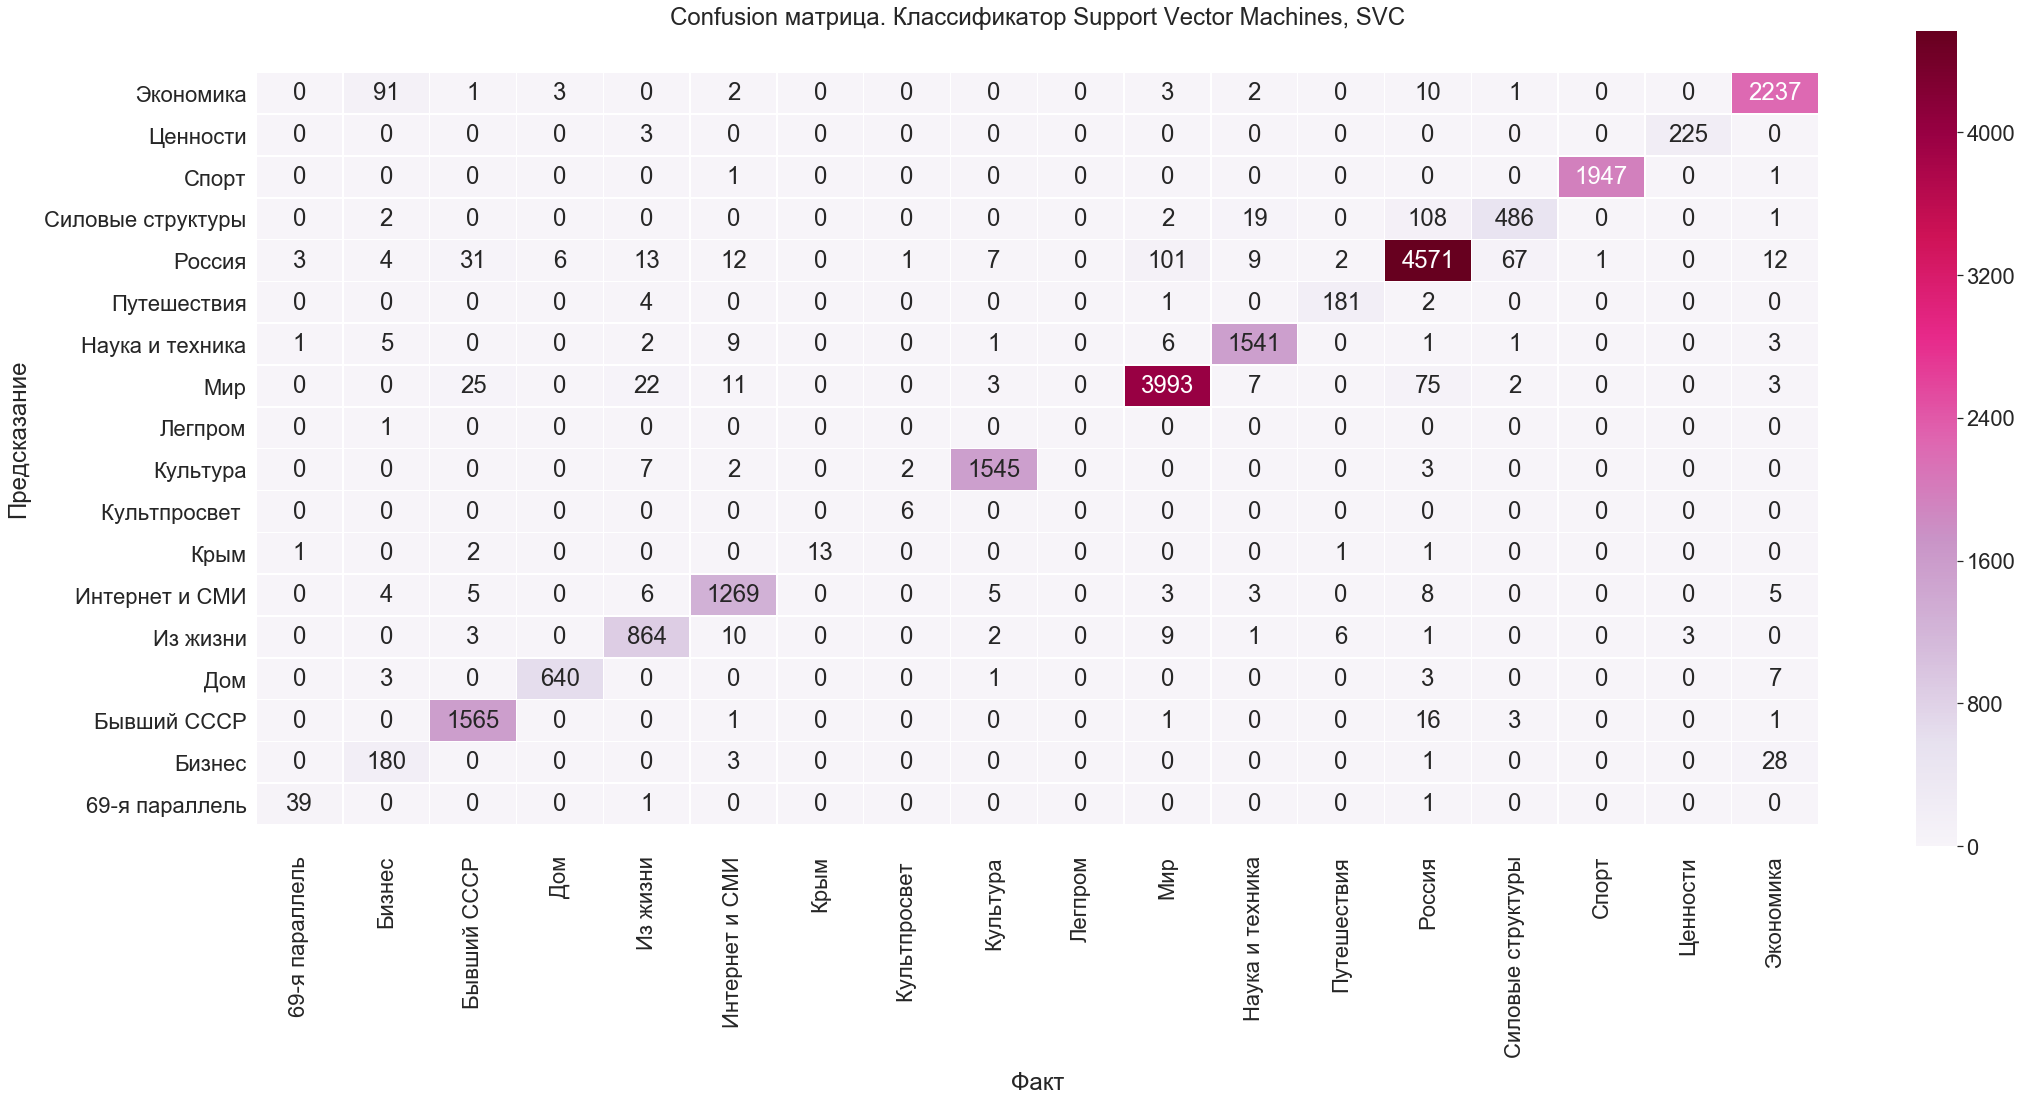

                   precision    recall  f1-score   support

   69-я параллель       0.89      0.95      0.92        41
           Бизнес       0.62      0.85      0.72       212
      Бывший СССР       0.96      0.99      0.97      1587
              Дом       0.99      0.98      0.98       654
         Из жизни       0.94      0.96      0.95       899
   Интернет и СМИ       0.96      0.97      0.97      1308
             Крым       1.00      0.72      0.84        18
    Культпросвет        0.67      1.00      0.80         6
         Культура       0.99      0.99      0.99      1559
          Легпром       0.00      0.00      0.00         1
              Мир       0.97      0.96      0.97      4141
  Наука и техника       0.97      0.98      0.98      1570
      Путешествия       0.95      0.96      0.96       188
           Россия       0.95      0.94      0.95      4840
Силовые структуры       0.87      0.79      0.83       618
            Спорт       1.00      1.00      1.00      1

In [11]:
heatconmat(labels_test,predictions_retrofit_embedding_csvn)
print(classification_report(labels_test,predictions_retrofit_embedding_csvn))

In [12]:
%%time
d_csvm = {
     'Model': 'Support Vector Machines, SVC',
     'Тrain Accuracy orig.emb.': accuracy_score(labels_train, csvc_embeddings.predict(features_train)),
     'Тest Accuracy orig.emb.': accuracy_score(labels_test, predictions_embeddings_csvm),
     'Тrain Accuracy ret.emb.': accuracy_score(labels_train, csvc_retrofit_embeddings.predict(X_retrofitted_vectors)),
     'Тest Accuracy ret.emb.': accuracy_score(labels_test, predictions_retrofit_embedding_csvn)
}

df_models_csvm = pd.DataFrame(d_csvm, index=[0])

Wall time: 26min 24s


In [26]:
d_csvm

{'Model': 'Support Vector Machines, SVC',
 'Тrain Accuracy orig.emb.': 0.9995701458320067,
 'Тest Accuracy orig.emb.': 0.7358022463800803,
 'Тrain Accuracy ret.emb.': 0.9999522384257785,
 'Тest Accuracy ret.emb.': 0.9608913347467184}

## Saving results

In [25]:
with open("[01].Models/df_models_lrc.pickle", 'wb') as output:
    pickle.dump(df_models_lrc, output)

In [51]:
with open("[01].Models/df_models_knnc.pickle", 'wb') as output:
    pickle.dump(df_models_knnc, output)

In [52]:
with open("[01].Models/df_models_crf.pickle", 'wb') as output:
    pickle.dump(df_models_crf, output)

In [27]:
with open("[01].Models/df_models_csvm.pickle", 'wb') as output:
    pickle.dump(df_models_csvm, output)

## Best classifier selection and comparison<br>Выбор наилучшего классификатора и их сравнение| 

In [31]:
path_pickles = "../Thesis'20/[01].Models/"

list_pickles = [
    "df_models_lrc.pickle",
    "df_models_knnc.pickle",
    "df_models_crf.pickle",
    "df_models_csvm.pickle"
]

In [32]:
df_all_classifiers = pd.DataFrame()

for pickle_ in list_pickles:
    
    path = path_pickles + pickle_
    
    with open(path, 'rb') as data:
        df = pickle.load(data)

    df_all_classifiers = df_all_classifiers.append(df)

df_all_classifiers = df_all_classifiers.reset_index().drop('index', axis=1)

In [33]:
df_all_classifiers

,Model,Тrain Accuracy orig.emb.,Тest Accuracy orig.emb.,Тrain Accuracy ret.emb.,Тest Accuracy ret.emb.
0,Logistic Regression,0.734143,0.724164,0.970706,0.958861
1,k Nearest Neighbours,0.735226,0.518562,0.951411,0.913438
2,Random Forest,0.999992,0.627137,0.999944,0.894492
3,"Support Vector Machines, SVC",0.999570,0.735802,0.999952,0.960891
